<center>
    <h1>Visualize Gradient Descent</h1>
</center>

# 1. Setup

In [1]:
# Import base librairies
import sys
from pathlib import Path
from IPython.display import display, Latex

# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project directory to kernel paths
sys.path.append("../..")

In [2]:
# Import custom functions
from src.visualization.plot_lib import default_viz
from src.data.file_manager import fetch_full_dataset, check_full_dataset, ProjectInfo

zoidbergInfo = ProjectInfo()

# Set default graphics visualization
%matplotlib inline
default_viz()

# Latex font
plt.rcParams["text.usetex"]=True

# 2. Derivative n = 1

#### Plotting the graph to show how derivative and rate of change works

In [3]:
x_1 = 1.85
x_2 = 2.7
x_3 = 1.5

x = np.linspace(1,3,5000)

h = 0.01

def small_x(a,b=None,dist=0.16):
    if b:
        return np.linspace(a-dist,b+dist,5000)
    else:
        return np.linspace(a-dist,a+dist,5000)

def J(x):
    return x*np.sin(np.power(x,2))

def slope(a,b):
    return (J(b)-J(a))/(b-a)

def tan(x,a,b):
    return J(a) + slope(a,b)*(x-a)

# Applying Gradient Descent to get the minima
x_min = 2
for i in range(30):
    x_min = x_min - 0.01*slope(x_min, x_min + 0.01)

print('Local minima : {:.3f}'.format(x_min))

Local minima : 2.189


Here we define a specif function $J$ such that :

$$J(\theta) = \theta\sin(\theta^2)$$

with $\theta \in [1,3]$. Then, we use a light version of gradient descent to get its local minima. Its value is equal to $\theta_{\min} = 2.19$.  
We also define functions to compute the slope of the derivative tangente at any point and the tangente itself.


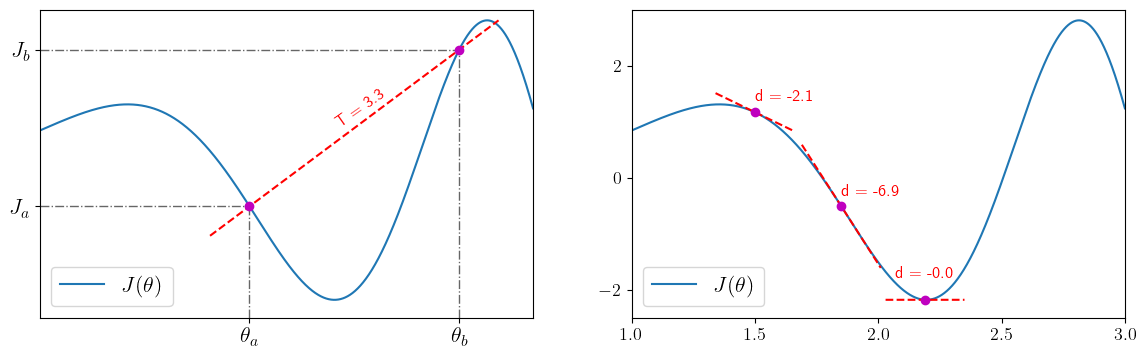

In [4]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.axvline(x=x_1,ymax=(J(x_1)+2.5)/5.5,color='k',linestyle='-.',linewidth=1,alpha=0.6)
plt.axvline(x=x_2,ymax=(J(x_2)+2.5)/5.5,color='k',linestyle='-.',linewidth=1,alpha=0.6)
plt.axhline(y=J(x_1),xmax=(x_1-1)/2,color='k',linestyle='-.',linewidth=1,alpha=0.6)
plt.axhline(y=J(x_2),xmax=(x_2-1)/2,color='k',linestyle='-.',linewidth=1,alpha=0.6)

plt.plot(x,J(x),label=r'$J(\theta)$')
plt.plot(small_x(x_1,x_2),tan(small_x(x_1,x_2),x_1,x_2),'r--')
plt.plot(x_1,J(x_1),'om',x_2,J(x_2),'om')

plt.ylim([-2.5,3])
plt.xlim([1,3])

plt.text(x=x_min, 
         y=tan(x_min,x_1,x_2)+0.3, 
         s='T = {:.1f}'.format(slope(x_1,x_2)), 
         rotation=35, 
         fontsize=12, 
         color='red')

plt.xticks(ticks=[x_1,x_2],labels=[r'$\theta_a$',r'$\theta_b$'],fontsize=16)
plt.yticks(ticks=[J(x_1),J(x_2)],labels=['$J_a$','$J_b$'],fontsize=16)
plt.legend(fontsize=16)

plt.subplot(122)
plt.plot(x,J(x),label=r'$J(\theta)$')
plt.plot(small_x(x_1),tan(small_x(x_1),x_1,x_1+h),'r--')
plt.plot(small_x(x_3),tan(small_x(x_3),x_3,x_3+h),'r--')
plt.plot(small_x(x_min),tan(small_x(x_min),x_min,x_min+h),'r--')
plt.plot(x_1,J(x_1),'om',x_3,J(x_3),'om',x_min,J(x_min),'om')

plt.text(x=x_1, 
         y=J(x_1)+0.2, 
         s='d = {:.1f}'.format(slope(x_1,x_1+h)), 
         fontsize=12, 
         color='red')
plt.text(x=x_3, 
         y=J(x_3)+0.2, 
         s='d = {:.1f}'.format(slope(x_3,x_3+h)), 
         fontsize=12, 
         color='red')
plt.text(x=x_min-0.12, 
         y=J(x_min)+0.4, 
         s='d = {:.1f}'.format(slope(x_min,x_min+h)), 
         fontsize=12, 
         color='red')

plt.ylim([-2.5,3])
plt.xlim([1,3])
plt.xticks(ticks=[1,1.5,2,2.5,3],fontsize=13)
plt.yticks(ticks=[-2,0,2], fontsize=13)
plt.legend(fontsize=16, loc='lower left')
plt.savefig(zoidbergInfo.resource_dir / 'derivative.png')